#Taller 3 - Espectro de potencia y función de correlación con SLIT
###Integrantes:
#####Daniel Steven Lozada - 1010148612
#####Federico Lopez - 1002576446
#####Santiago Erazo Mora - 1082658664

In [1]:
!pip install lcapy==1.14
!pip install folium==0.2.1
!pip install pdflatex
!sudo apt-get install texlive-latex-recommended 
!sudo apt install texlive-latex-extra
!sudo apt install dvipng
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79794 sha256=836c45151a72dfbc58e928f62febc75495aa9dee36c43fe1cb0134c8c9a74058
  Stored in directory: /root/.cache/pip/wheels/00/0c/07/d7792a5444d5bb074361ac27da53cee9d5cce59a07fe9da5dd
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.14.0
    Uninstalling folium-0.14.0:
      Successfully uninstalled folium-0.14.0
ERROR: pip's dependency resolver does not currently take into account all the packa

In [2]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import gamma
from lcapy import Circuit, j , omega, s
from lcapy import *

from scipy.signal import lti
from scipy.stats import expon
import scipy.fftpack as fourier
from scipy.fftpack import fft,fftfreq,fftshift
import seaborn as sns  ##HISTOGRAMAS
from numpy import logspace
import sympy as sym

#Circuito

In [3]:
ctt=Circuit(
"""
    Vi 1 0_1 step;down
    C1 1 2; right, size=1.5
    R1 2 0; down, size=1.5
    R2 2 3; right, size=1.5
    C2 3 0_2; right, size=1.5
    
    
    W 0_1 0;right
    W 0 0_2;right
    

"""
)

#Funcion de transferencia

In [4]:
H=(ctt.C2.V(s)/ctt.Vi.V(s)).simplify()
H

                   C₁⋅R₁⋅s                    
──────────────────────────────────────────────
             2                                
C₁⋅C₂⋅R₁⋅R₂⋅s  + s⋅(C₁⋅R₁ + C₂⋅R₁ + C₂⋅R₂) + 1

#Valores capacitivos y resistivos

In [5]:
C1=4.7e-4
C2=4.7e-4
R1=2000
R2=2000

Coeficientes_num=[C1*R1,0]
Coeficientes_dem=[C1*C2*R2*R1,C1*R1+C2*R1+C2*R2,1]

In [6]:
import control

#Funcion de transferencia y frecuencia de corte

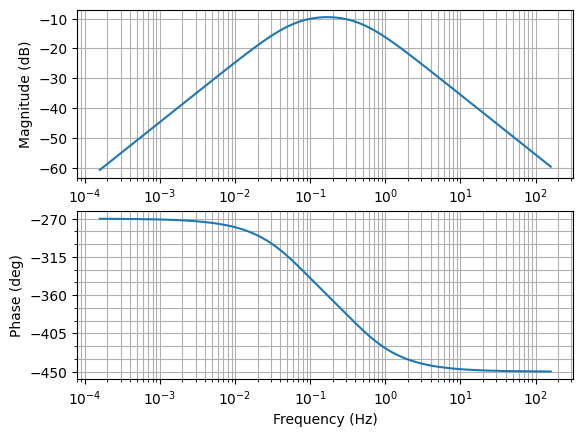

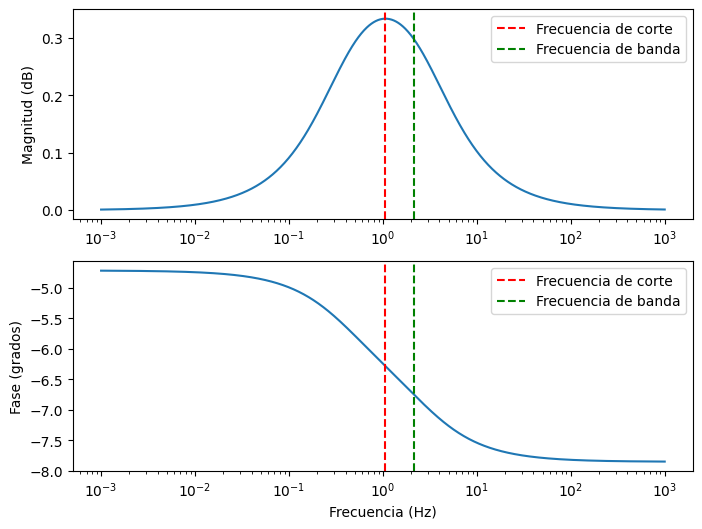

In [7]:
sys = control.TransferFunction(Coeficientes_num, Coeficientes_dem)  # Crear el sistema LTI
dt = 0.002  # Base de tiempo deseada en segundos
sys_d = control.c2d(sys, dt)

# Definir el rango de frecuencias
omega = np.logspace(-3, 3, num=1000)

# Obtener la respuesta en frecuencia
mag, phase, omega = control.bode(sys, omega, dB=True, Hz=True)

f0 = 1/(np.sqrt(C1*C2*R1*R2))
B = 1 / (R1 * C1) + 1 / (R2 * C2)

# Graficar la respuesta en frecuencia
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.semilogx(omega, mag)
ax1.set_ylabel('Magnitud (dB)')
ax1.axvline(f0, color='red', linestyle='--', label='Frecuencia de corte')
ax1.axvline(B, color='green', linestyle='--', label='Frecuencia de banda')
ax1.legend()

ax2.semilogx(omega, phase)
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Fase (grados)')
ax2.axvline(f0, color='red', linestyle='--', label='Frecuencia de corte')
ax2.axvline(B, color='green', linestyle='--', label='Frecuencia de banda')
ax2.legend()

plt.show()

In [8]:
print(sys_d)


0.002121 z - 0.002121
----------------------
z^2 - 1.994 z + 0.9936

dt = 0.002



(array([0.00939709, 0.00948407, 0.00957186, 0.00966046, 0.00974988,
        0.00984012, 0.0099312 , 0.01002312, 0.01011589, 0.01020952,
        0.01030401, 0.01039938, 0.01049562, 0.01059276, 0.01069079,
        0.01078973, 0.01088959, 0.01099036, 0.01109207, 0.01119472,
        0.01129831, 0.01140287, 0.01150838, 0.01161488, 0.01172235,
        0.01183082, 0.01194029, 0.01205077, 0.01216228, 0.01227481,
        0.01238838, 0.012503  , 0.01261867, 0.01273542, 0.01285324,
        0.01297215, 0.01309215, 0.01321327, 0.0133355 , 0.01345886,
        0.01358336, 0.01370901, 0.01383581, 0.01396379, 0.01409294,
        0.01422329, 0.01435484, 0.0144876 , 0.01462159, 0.01475681,
        0.01489328, 0.01503101, 0.01517001, 0.01531029, 0.01545186,
        0.01559473, 0.01573892, 0.01588444, 0.01603131, 0.01617952,
        0.0163291 , 0.01648006, 0.0166324 , 0.01678615, 0.01694132,
        0.01709791, 0.01725595, 0.01741544, 0.0175764 , 0.01773884,
        0.01790277, 0.01806821, 0.01823517, 0.01

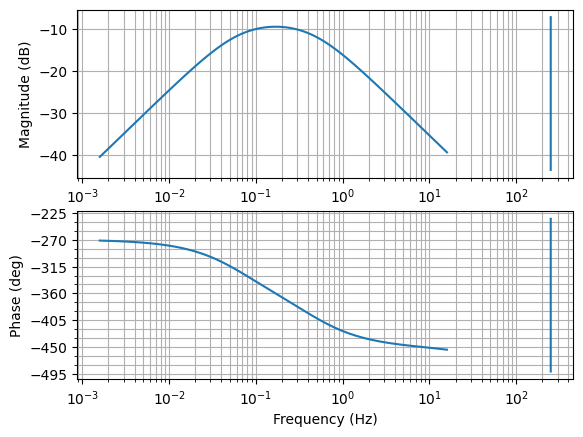

In [9]:
# Ajustar el rango de frecuencias
frequencies = np.logspace(-2, 2, num=1000)  # Generar una lista de frecuencias en escala logarítmica

# Graficar la respuesta en frecuencia
control.bode_plot(sys_d, omega=frequencies, dB=True, Hz=True)

#Respuesta impulso

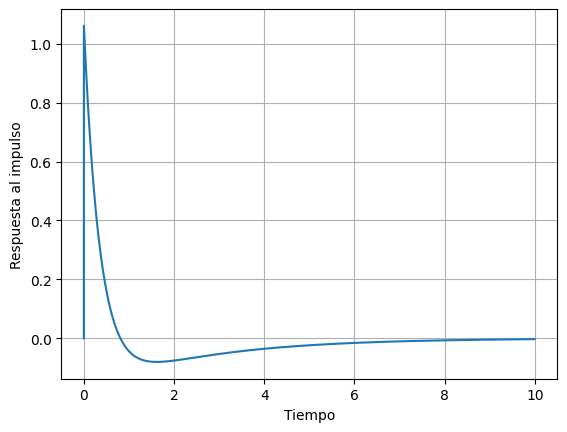

In [10]:
t, y = control.impulse_response(sys_d)
plt.plot(t, y)
plt.xlabel('Tiempo')
plt.ylabel('Respuesta al impulso')
plt.grid(True)
plt.show()

#Generacion de ruibo blanco Gaussiano

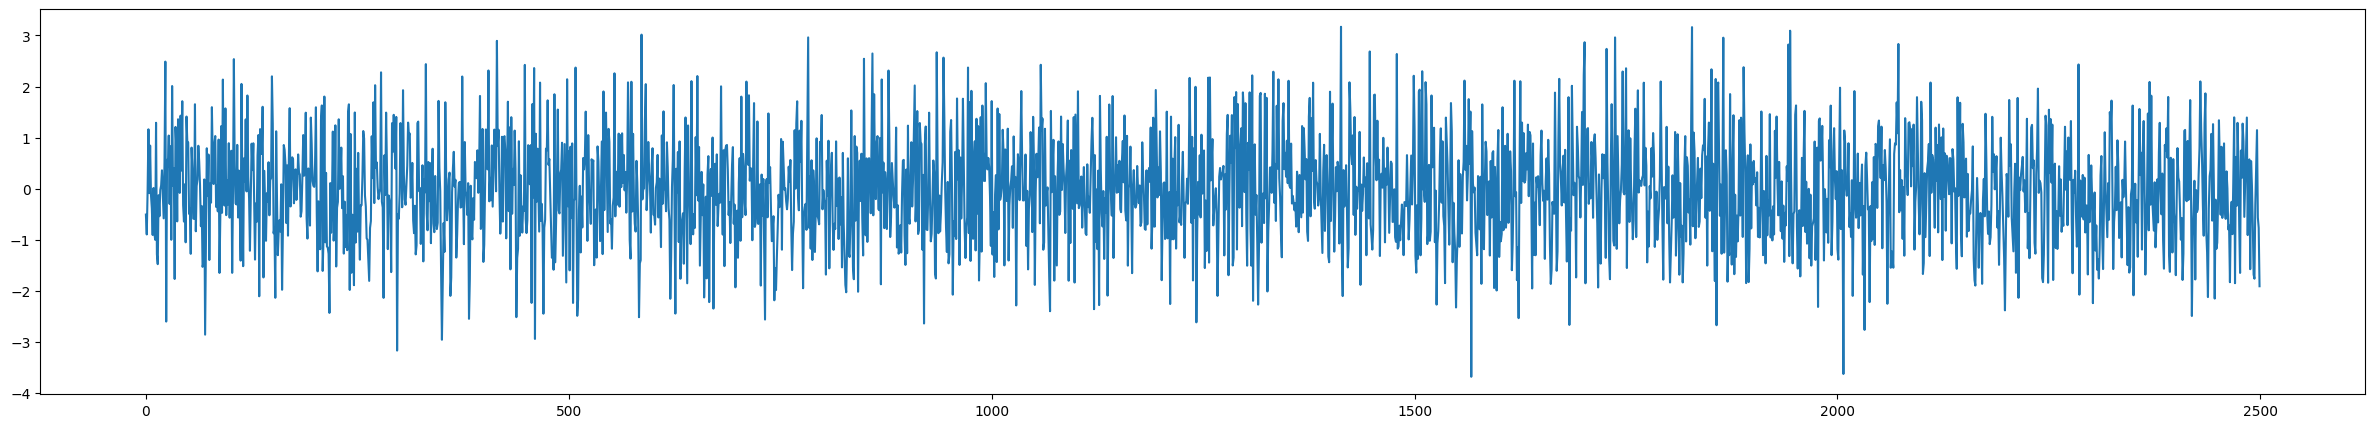

In [11]:
t1=np.arange(-2.5,2.5,dt)

media=0
varianza=1

GWN=np.random.normal(media,varianza,len(t1))

plt.figure(figsize=(30,5))

plt.plot(GWN)

#Autocorrelacion del ruido blanco gaussiano

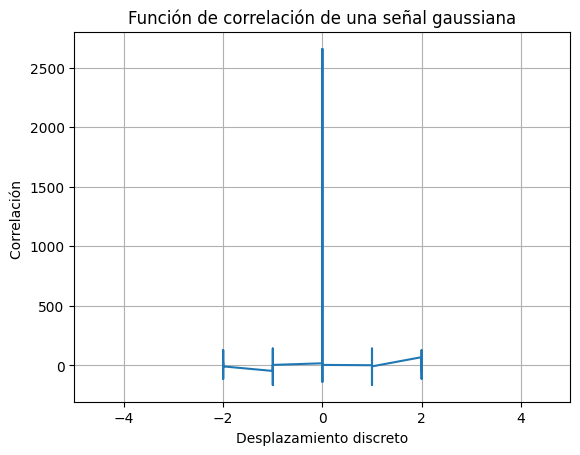

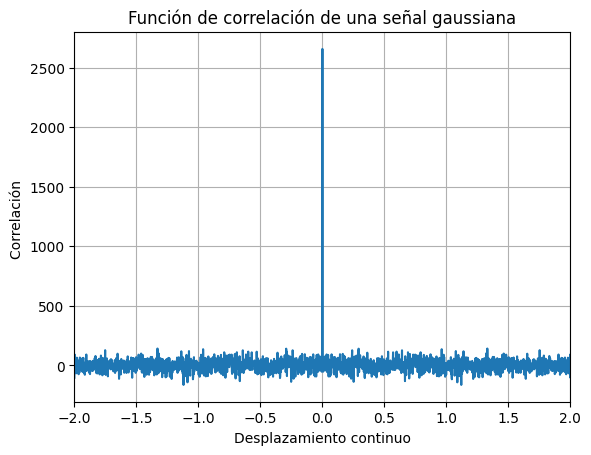

In [12]:
vector_discrete = np.round(t1).astype(int) # Vector discretizado

correlacion1=np.correlate(GWN,GWN,mode='same')
# Graficar la función de correlación
plt.plot(vector_discrete, correlacion1)
plt.xlabel('Desplazamiento discreto')
plt.ylabel('Correlación ')
plt.title('Función de correlación de una señal gaussiana')
plt.xlim(-5,5)

plt.grid(True)
plt.show()

correlacion=np.correlate(GWN,GWN,mode='same')
# Graficar la función de correlación
plt.plot(t1, correlacion)
plt.xlabel('Desplazamiento continuo')
plt.ylabel('Correlación ')
plt.title('Función de correlación de una señal gaussiana')
plt.xlim(-2,2)

plt.grid(True)
plt.show()

#Autocorrelacion del ruido blanco gaussiano normalizado

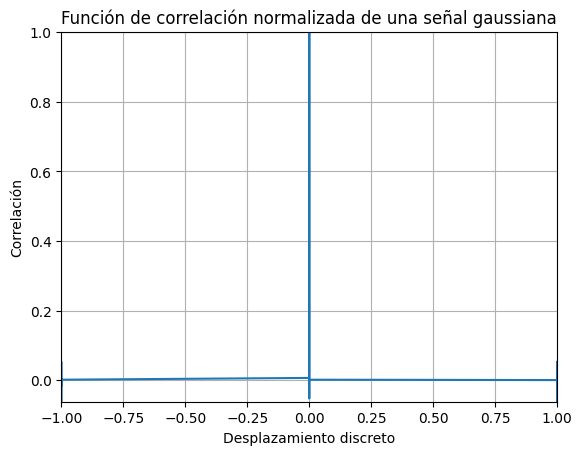

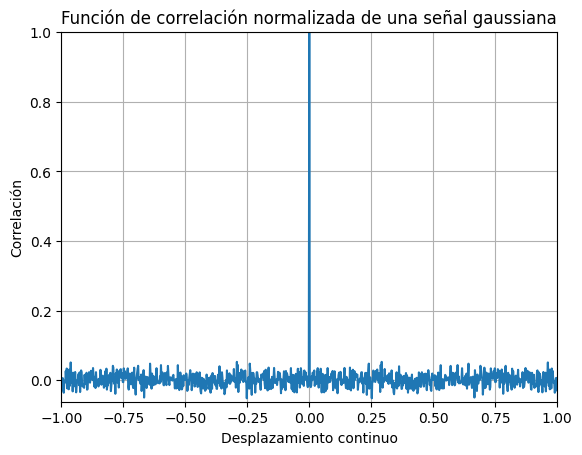

In [14]:
vector_discrete = np.round(t1).astype(int) # Vector discretizado

correlacion1 = np.correlate(GWN, GWN, mode='same')
# Normalizar la función de correlación
correlacion1 = correlacion1 / np.max(correlacion1)#se divide por el valor maximo de la funcion de correlacion para normalizar

# Graficar la función de correlación normalizada
plt.plot(vector_discrete, correlacion1)
plt.xlabel('Desplazamiento discreto')
plt.ylabel('Correlación')
plt.title('Función de correlación normalizada de una señal gaussiana')
plt.ylim(min(correlacion1),1)
plt.xlim(-1,1)
plt.grid(True)
plt.show()

correlacion = np.correlate(GWN, GWN, mode='same')
# Normalizar la función de correlación
correlacion = correlacion / np.max(correlacion)

# Graficar la función de correlación normalizada
plt.plot(t1, correlacion)
plt.xlabel('Desplazamiento continuo')
plt.ylabel('Correlación')
plt.title('Función de correlación normalizada de una señal gaussiana')
plt.ylim(min(correlacion1),1)
plt.xlim(-1,1)
plt.grid(True)
plt.show()

#Salida del sistema SLIT con entrada de ruido blanco gaussiano

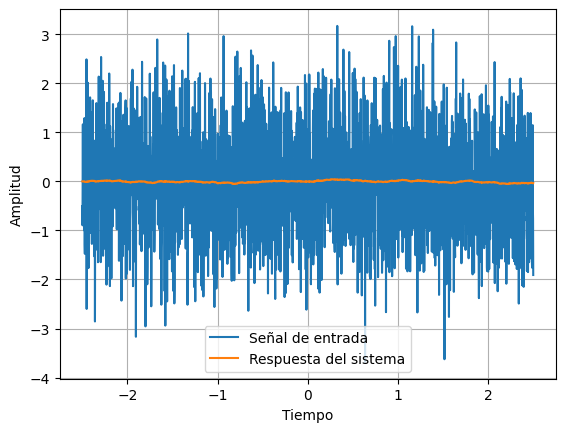

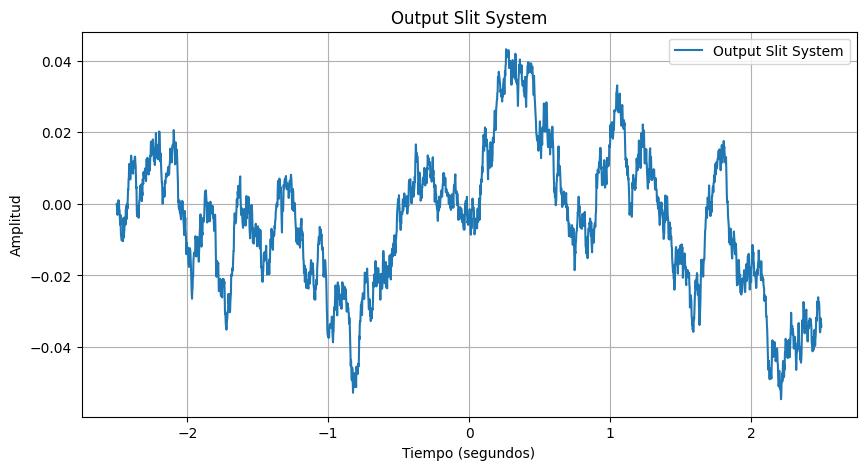

<Figure size 1000x500 with 0 Axes>

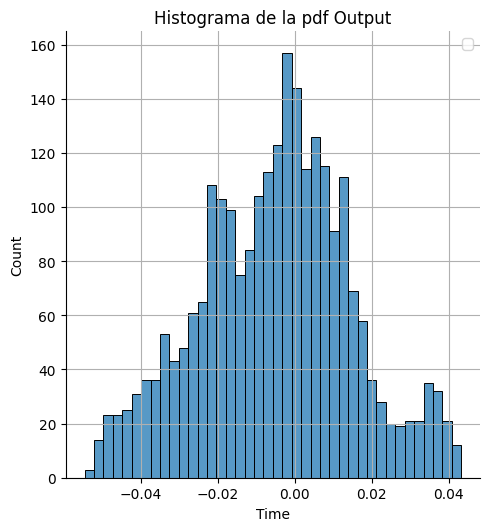

In [15]:
t_out_1, y_4 = control.forced_response(sys_d, T=t1, U=GWN)
plt.plot(t1, GWN, label='Señal de entrada')
plt.plot(t_out_1, y_4, label='Respuesta del sistema')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

#pdf Output:
plt.figure(figsize=(10,5))
plt.title("Output Slit System")
plt.plot(t1, y_4,label="Output Slit System")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()

#Histograma de la pdf Output:
plt.figure(figsize=(10,5))
sns.displot(y_4,bins=40)
hist_kws={"edgecolor":"balck"}
plt.title("Histograma de la pdf Output")
plt.xlabel("Time")
plt.grid()
#plt.xlim(-1,1)
plt.legend()

#Autocorrelacion de la salida del circuito

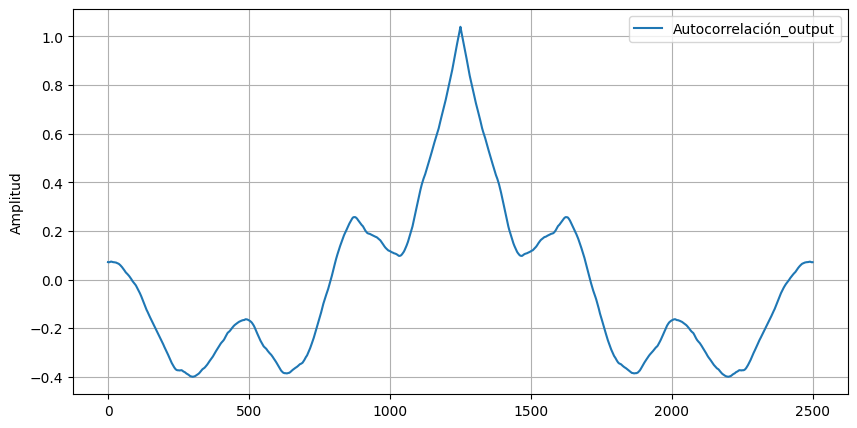

In [16]:
autocorrelacion_output=np.correlate(y_4,y_4,mode="same")

#Autocorrelación output:
plt.figure(figsize=(10,5))
plt.plot(autocorrelacion_output,label="Autocorrelación_output")
plt.legend()
plt.ylabel("Amplitud")
plt.grid()

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def Ploteo_tiempo_frecuencia(tiempo, Funcion_tiempo, xmax=None, xmin=None):
    # La frecuencia de muestreo la extraigo del vector de tiempo
    Frecuencia_muestreo = tiempo[1] - tiempo[0]
    Y = np.fft.fftshift(np.fft.fft(Funcion_tiempo))
    W = np.fft.fftshift(np.fft.fftfreq(Y.shape[0], Frecuencia_muestreo))  # Vector de frecuencias
    
    # Inicializa la figura con un tamaño adecuado 
    plt.figure(figsize=(16, 5), dpi=90)
    
    # Graficamos la función en el tiempo
    plt.subplot(121)
    plt.plot(Funcion_tiempo, color='C0')
    plt.title("Correlación")
    plt.grid(True)
    plt.ylabel('Amplitud')
    
    # Graficamos la representación en frecuencia
    plt.subplot(122)
    plt.plot(W, Y, color='C1')
    plt.title('Representación en Frecuencia')
    plt.grid(True)
    if xmin != None and xmax != None:
        plt.xlim(xmin, xmax)
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud')

def Ploteo_tiempo_frecuencia2(tiempo, Funcion_tiempo, xmax=None, xmin=None):
    # La frecuencia de muestreo la extraigo del vector de tiempo
    Frecuencia_muestreo = tiempo[1] - tiempo[0]
    Y = np.fft.fftshift(np.fft.fft(Funcion_tiempo))
    W = np.fft.fftshift(np.fft.fftfreq(Y.shape[0], Frecuencia_muestreo))  # Vector de frecuencias
    
    # Inicializa la figura con un tamaño adecuado 
    plt.figure(figsize=(25, 5), dpi=90)
    plt.plot(W, Y, color='C1')
    plt.title('Representación en Frecuencia')
    plt.grid(True)
    if xmin != None and xmax != None:
        plt.xlim(xmin, xmax)
    plt.xlabel('Frecuencia [KHz]')
    plt.ylabel('Amplitud')

#Espectro de potencia del ruido blanco gaussiano de entrada

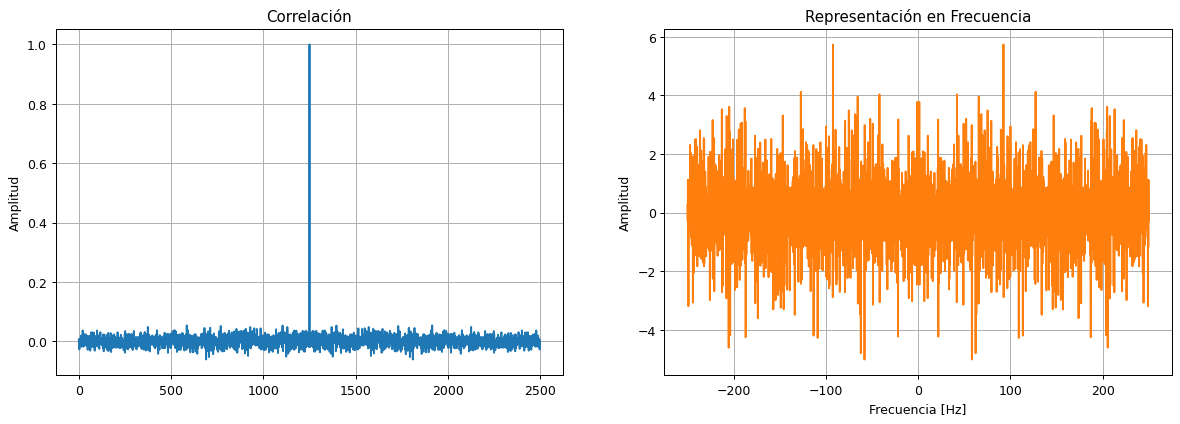

In [19]:
#Espectro de potencia pdf gaussiana de entrada:
Ploteo_tiempo_frecuencia(t1,correlacion)

#Espectro de potencia del ruido blanco gaussiano de salida

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


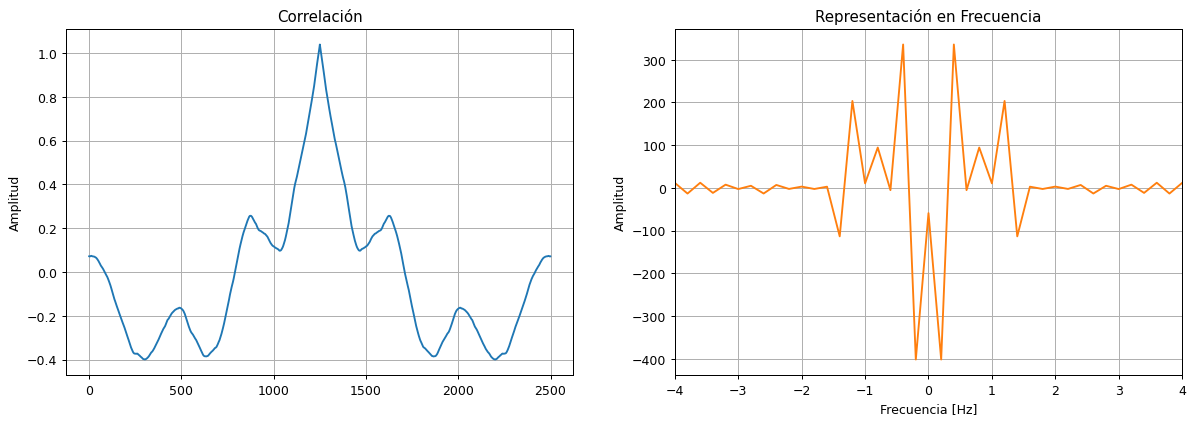

In [25]:
#Espectro de potencia pdf gaussiana de salida:
Ploteo_tiempo_frecuencia(t1,autocorrelacion_output,xmax=4,xmin=-4)

#Correlacion entre el ruido blanco gaussiano de entrada y salida

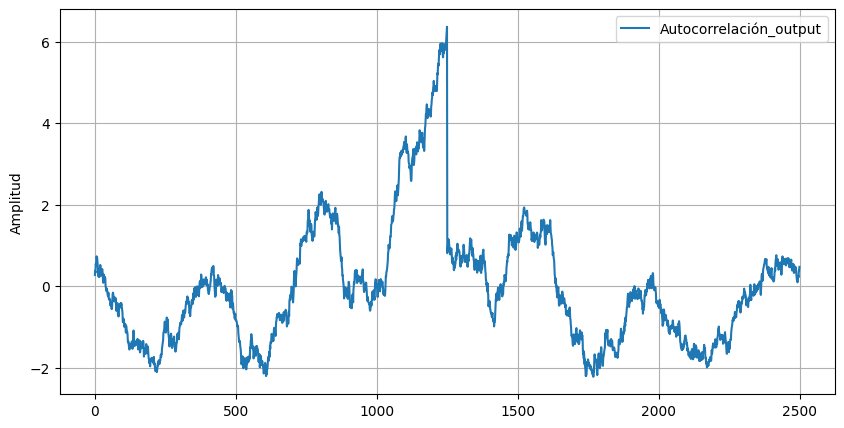

In [27]:
autocorrelacion_output_SE=np.correlate(GWN,y_4,mode="same")

#Autocorrelación output:
plt.figure(figsize=(10,5))
plt.plot(autocorrelacion_output_SE,label="Autocorrelación_output")
plt.legend()
plt.ylabel("Amplitud")
plt.grid()

#Espectro de potencia entre el ruido blanco gaussiano de entrada y salida

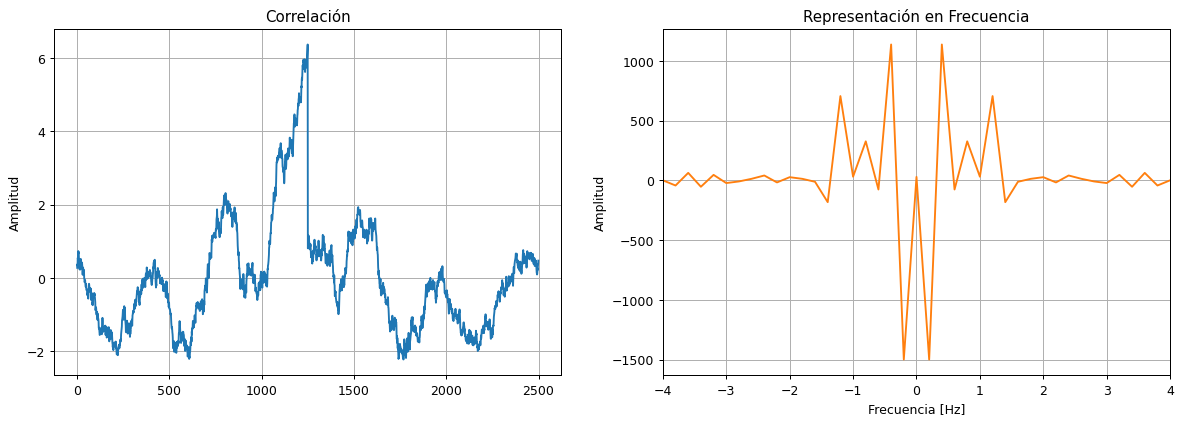

In [29]:
#Espectro de potencia pdf gaussiana de salida:
Ploteo_tiempo_frecuencia(t1,autocorrelacion_output_SE,xmax=4,xmin=-4)

#Ruido blanco gaussiano sumado una señal senoidal

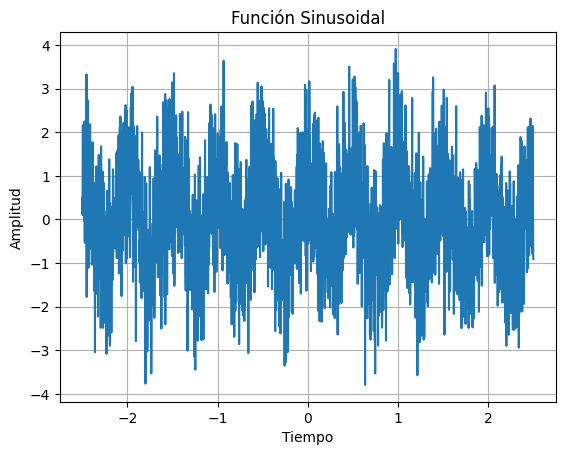

In [39]:
## COMO PRIMERA MEDIDA GENERAMOS NUESTRO PULSO CUADRADO:

# Parámetros de la función sinusoidal
amplitud = 1.0
frecuencia = 2.0  # Número de ciclos por unidad de tiempo
fase = np.pi / 2  # Fase inicial en radianes



# Cálculo de la función sinusoidal
sen = amplitud * np.sin(2*np.pi*frecuencia*t1 + fase)

señal_generada=sen+GWN

# Graficar la función sinusoidal
plt.plot(t1, señal_generada)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Función Sinusoidal')

plt.grid(True)
plt.show()

#Autocorrelacion del ruido blanco gaussiano más senoidal 

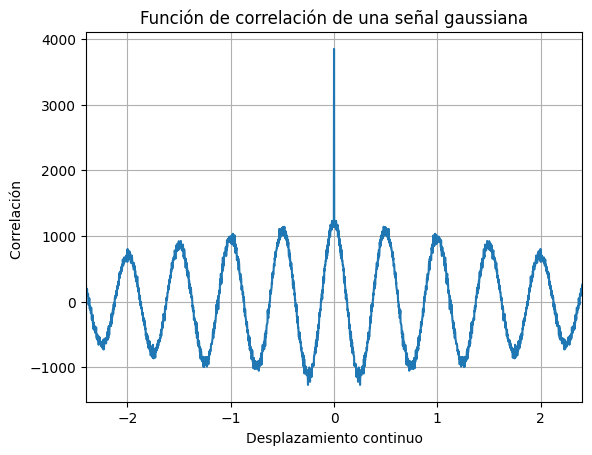

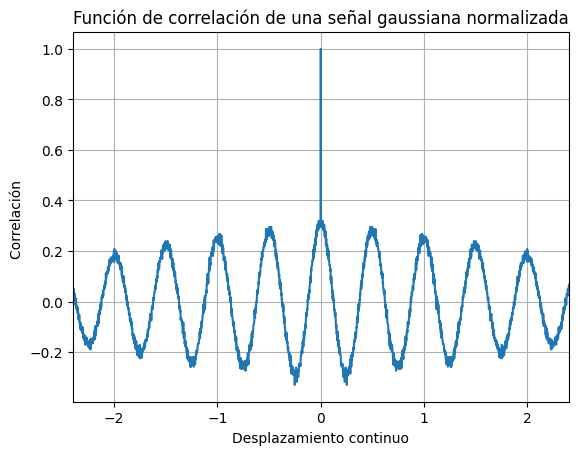

In [41]:
correlacion_sen=np.correlate(señal_generada,señal_generada,mode='same')

correlacion_sen_n=correlacion_sen/np.max(correlacion_sen)
# Graficar la función de correlación
plt.plot(t1, correlacion_sen)
plt.xlabel('Desplazamiento continuo')
plt.ylabel('Correlación ')
plt.title('Función de correlación de una señal gaussiana')
plt.xlim(-2.4,2.4)
plt.grid(True)
plt.show()

plt.plot(t1, correlacion_sen_n)
plt.xlabel('Desplazamiento continuo')
plt.ylabel('Correlación ')
plt.title('Función de correlación de una señal gaussiana normalizada')
plt.xlim(-2.4,2.4)

plt.grid(True)
plt.show()

#Salida del sistema

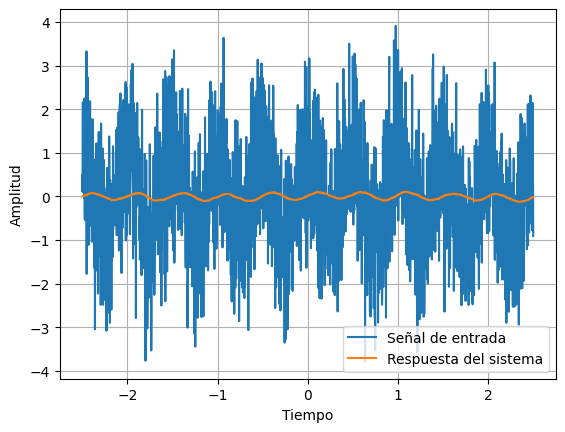

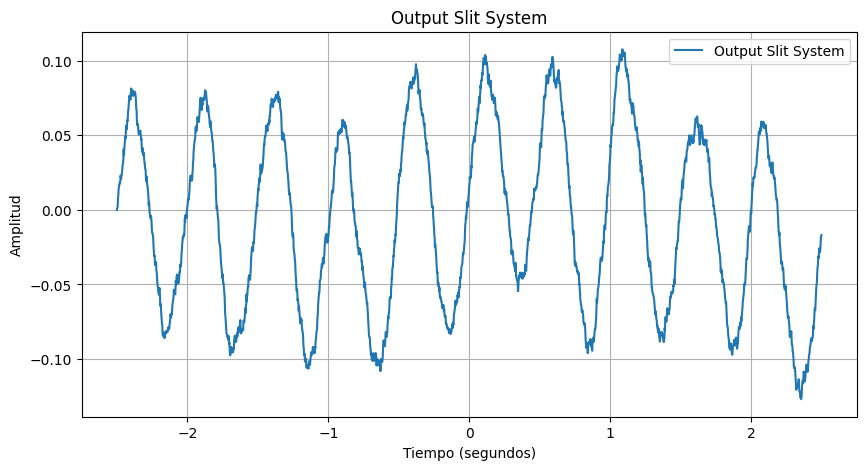

<Figure size 1000x500 with 0 Axes>

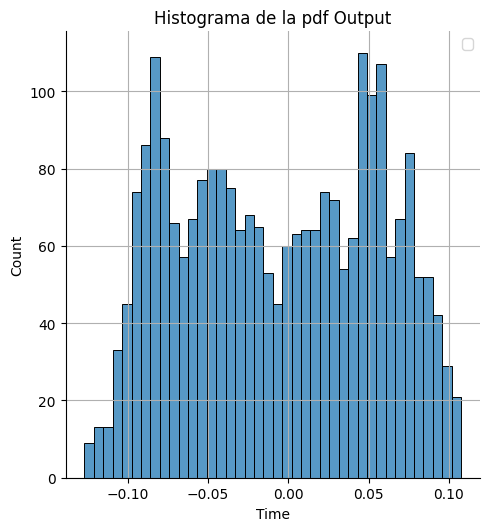

In [45]:
t_out_2, y_5 = control.forced_response(sys_d, T=t1, U=señal_generada)
plt.plot(t_out_2, señal_generada, label='Señal de entrada')
plt.plot(t_out_2, y_5, label='Respuesta del sistema')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

#pdf Output:
plt.figure(figsize=(10,5))
plt.title("Output Slit System")
plt.plot(t1, y_5,label="Output Slit System")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()

#Histograma de la pdf Output:
plt.figure(figsize=(10,5))
sns.displot(y_5,bins=40)
hist_kws={"edgecolor":"balck"}
plt.title("Histograma de la pdf Output")
plt.xlabel("Time")
plt.grid()
#plt.xlim(-1,1)
plt.legend()

#Autocorrelacion de la salida del sistema

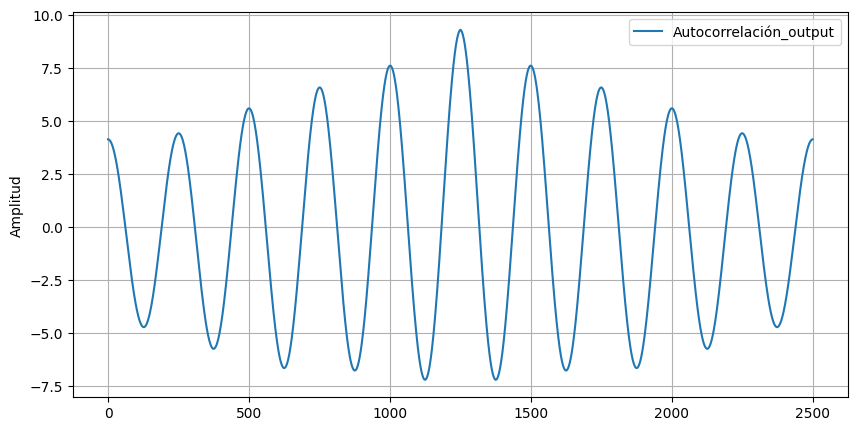

In [47]:
autocorrelacion_output_1=np.correlate(y_5,y_5,mode="same")

#Autocorrelación output:
plt.figure(figsize=(10,5))
plt.plot(autocorrelacion_output_1,label="Autocorrelación_output")
plt.legend()
plt.ylabel("Amplitud")
plt.grid()

#Correlacion de la entrada y salida

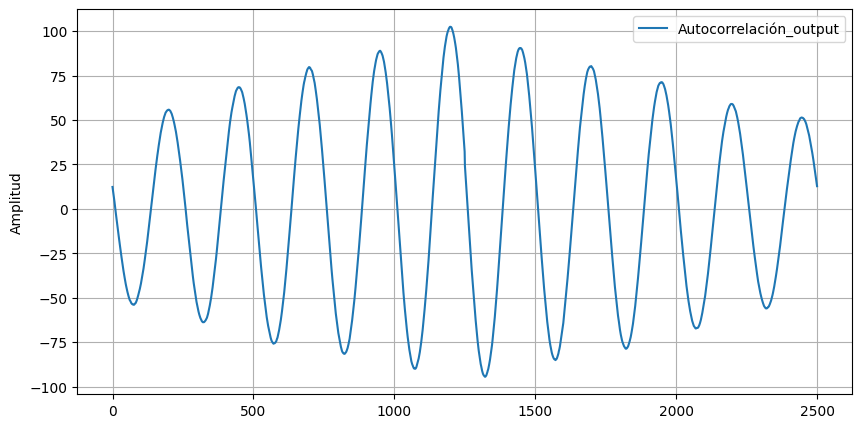

In [48]:
autocorrelacion_output_SE1=np.correlate(señal_generada,y_5,mode="same")

#Autocorrelación output:
plt.figure(figsize=(10,5))
plt.plot(autocorrelacion_output_SE1,label="Autocorrelación_output")
plt.legend()
plt.ylabel("Amplitud")
plt.grid()

#Espectro de potencia de la entrada

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


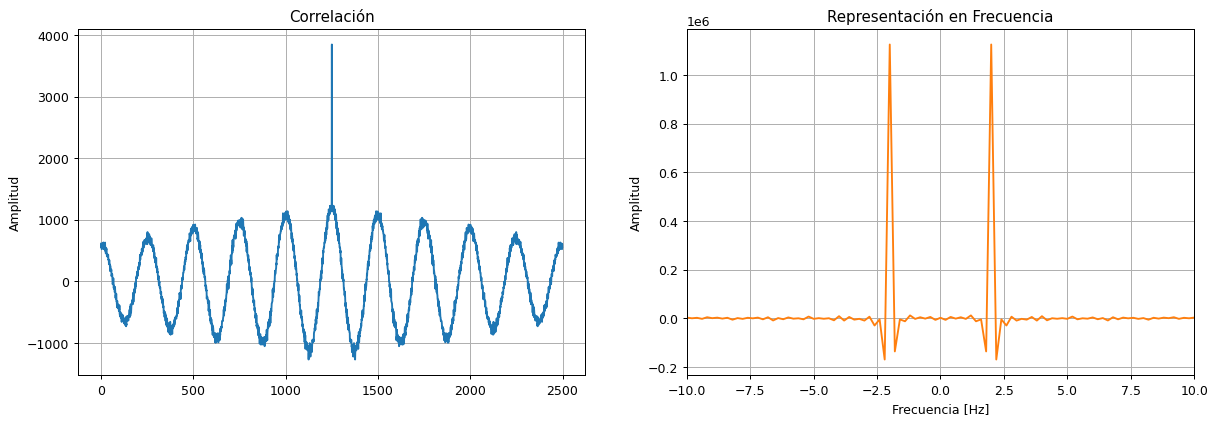

In [55]:
#Espectro de potencia pdf gaussiana de entrada:
Ploteo_tiempo_frecuencia(t1,correlacion_sen,xmax=10,xmin=-10)

#Espectro de potencia de la salida 

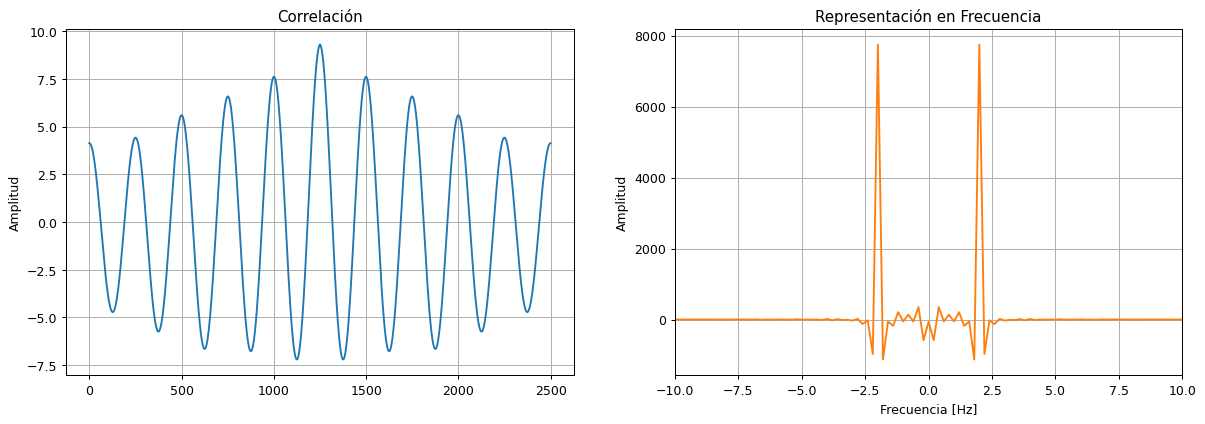

In [56]:
#Espectro de potencia pdf gaussiana de entrada:
Ploteo_tiempo_frecuencia(t1,autocorrelacion_output_1,xmax=10,xmin=-10)

#Espectro de potencia de la entrada y salida 

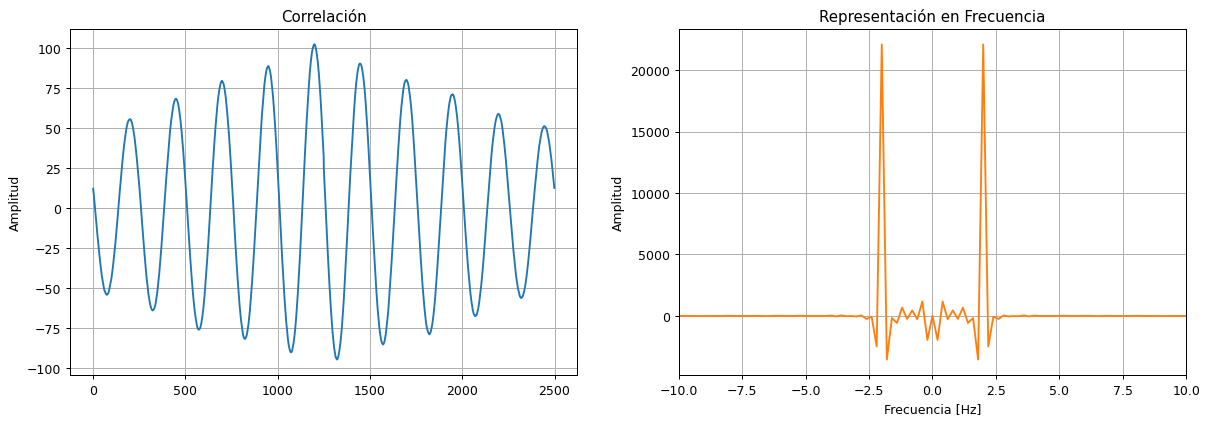

In [57]:
#Espectro de potencia pdf gaussiana de entrada:
Ploteo_tiempo_frecuencia(t1,autocorrelacion_output_SE1,xmax=10,xmin=-10)